## Importing libraries

In [8]:
import os
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from utilities import *
import matplotlib.pyplot as plt

In [9]:
if 'generated_graphs' not in os.listdir('./'):
    subprocess.run('mkdir generated_graphs', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

## Read dataset

In [10]:
csv_name = 'ara_fast'
df = pd.read_csv(f'./benchmarks/csv_benchmarks/{csv_name}.csv')

In [11]:
if csv_name not in os.listdir('./generated_graphs'):
    subprocess.run(f'mkdir ./generated_graphs/{csv_name}', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

## Choose 

In [12]:
df['char_acc'] = df['char_acc'].str.replace('%', '').astype(float)
df['word_acc'] = df['word_acc'].str.replace('%', '').astype(float)

# df.fillna(0, inplace=True)

In [13]:
datasets_names_all = [benchmark.replace('.tar.lzma', '') 
                      for benchmark in sorted(os.listdir('./benchmarks/zipped_benchmarks')) 
                      if benchmark != 'ground_truth.tar.lzma']
benchmarks_means = [
    16.2, 14.4, 16, 18.6, 97.3, 17.7, 23.3, 25, 14.9, 18.6,
    87.9, 15.7, 23.3, 26.8, 19, 100, 37.3, 22.1, 70.6, 97.3,
    16.6, 22.1, 28.8, 86, 81.8, 96.1, 20.7, 38, 39.2, 17.2,
    100, 23.5, 22.4, 27.9, 71.4, 15.4, 22.3, 28.4, 55.2, 49.3,
    92.2, 18.6, 35.2, 38.7
]

datasets_numbers_dict = dict(zip(datasets_names_all, benchmarks_means))

datasets_best_names_all = [benchmark.replace('.tar.lzma', '') 
                           for benchmark in sorted(os.listdir('./benchmarks/zipped_benchmarks')) 
                           if benchmark != 'ground_truth.tar.lzma' and 'snp' not in benchmark]

best_benchmarks_means = [
    11.9366, 11.6115, 12.0189, 9.364, 12.7138, 16.4465, 22.4102, 11.755, 
    10.4056, 11.3537, 16.3141, 23.4728, 15.3716, 33.4123, 18.682, 68.4353, 
    10.4519, 13.8798, 22.3501, 17.2242, 35.3142, 34.5271, 15.3046, 21.3564, 
    18.9262, 26.4644, 9.6978, 14.8571, 23.0667, 16.3379, 32.2702, 34.5879
    ]

datasets_best_numbers_dict = dict(zip(datasets_best_names_all, best_benchmarks_means))

dai_benchmarks_means = [
    7.2, 7.7, 11.7, 7.5, 10.7, 8.9, 14.8, 20.4, 
    10, 7.3, 7.4, 9.2, 12.9, 19.8, 18.7, 98.5, 22.3,
    23.2, 25.1, 10.1, 8.9, 14.7, 20.7, 15.8, 18.3, 23.9,
    14, 32.9, 34, 15.4, 92.2, 16.4, 19.8, 23.6, 8.2, 9.8,
    13.2, 20.2, 8.5, 12.9, 19.9, 12.9, 30.9, 32.7
    ]

dai_datasets_numbers_dict = dict(zip(datasets_names_all, dai_benchmarks_means))


yarmouk_01_col
mean: 85.72530000000002


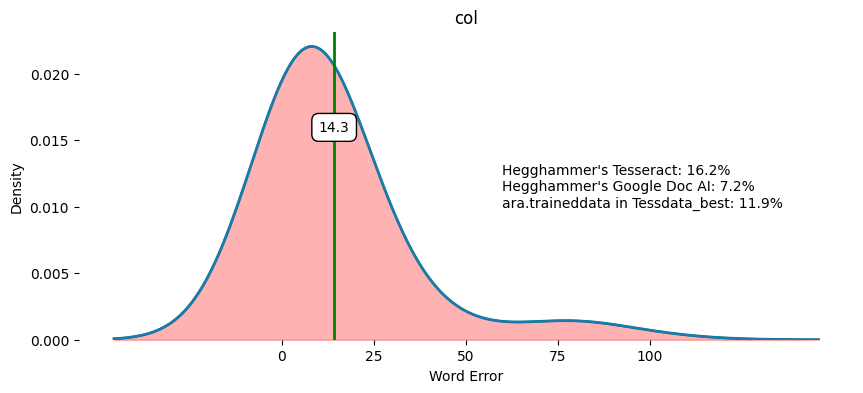

yarmouk_02_bin
mean: 86.1851


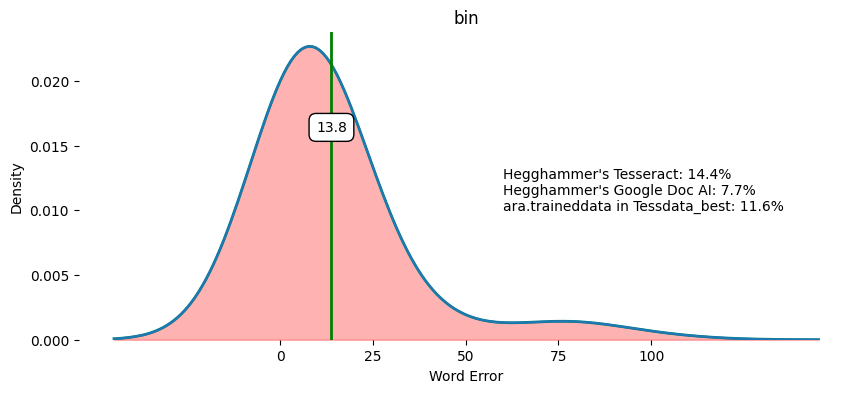

yarmouk_03_col_blur
mean: 83.4781


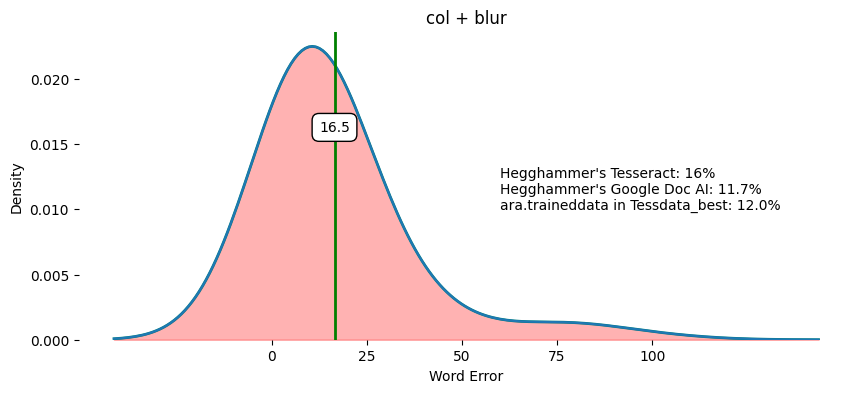

yarmouk_04_col_weak
mean: 82.5421


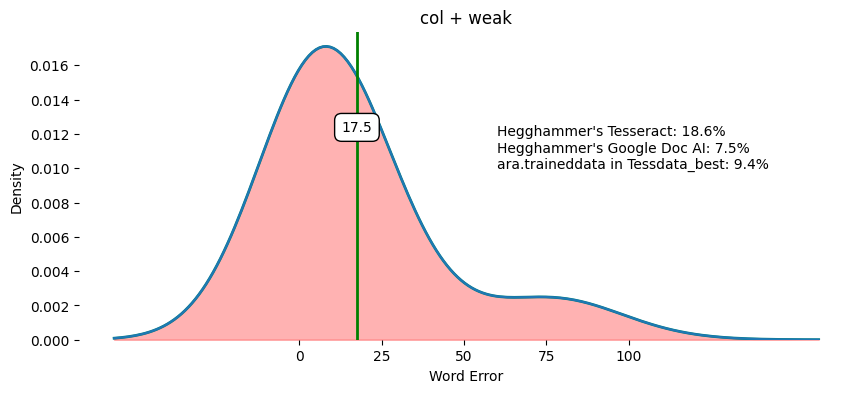

yarmouk_06_col_wm
mean: 84.98919999999998


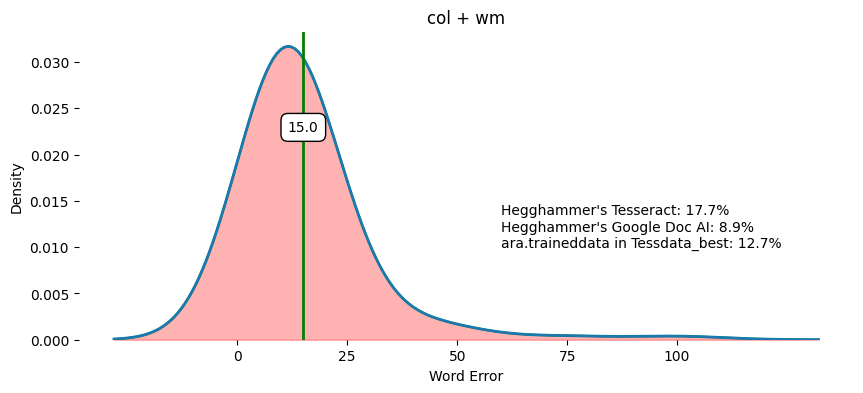

yarmouk_07_col_scrib
mean: 78.44219999999999


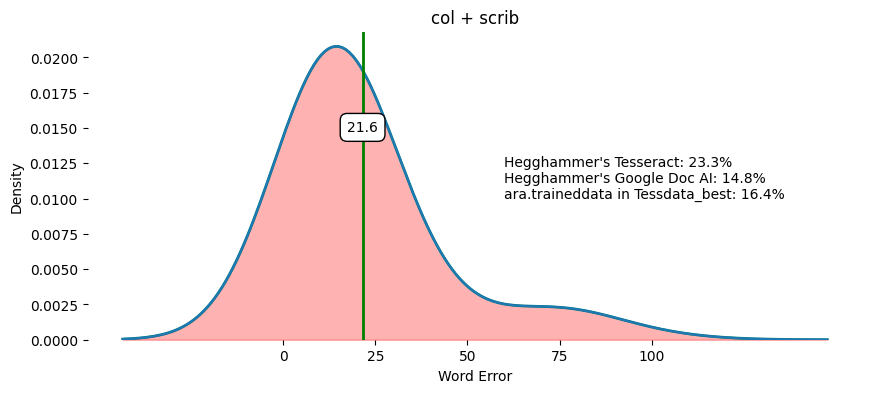

In [14]:
folder_path = f"./generated_graphs/{csv_name}"

datasets_names = df.dataset.unique()
for name in sorted(datasets_names):
    print(name)
    df_final = df[df['dataset'] == name]
    title = name[11:].replace('_', ' + ')
    text = f"""Hegghammer's Tesseract: {datasets_numbers_dict[name]}%\nHegghammer's Google Doc AI: {dai_datasets_numbers_dict[name]}%\nara.traineddata in Tessdata_best: {datasets_best_numbers_dict[name]:.1f}%"""
    create_graph(df=df_final, title=title, text=text, folder_path=folder_path)